In [1]:
#prefix=""
#prefix="cut_"
#prefix="bw_filtered_"
prefix="bw_cut_"
#prefix="filtered_"
#bw=''                  #ha nincs bw, akkor ezt be kell allitani ures stringre, mert az R megjegyzi a korabbi bw erteket
#bw=0.2                 #ha a prefix bw-vel kezdodik, akkor a rekordok szama 2x annyi, mert van bin_width=0.2 es =0.31-gyel szamolt sor is
bw=0.31

#kezi + automata algs
df=read.csv(paste0(prefix,"_bw_",bw,"_df.csv")) 

#Lars
df1=read.csv("sved_ai_pet_lung_segm/Radiomics_vals_for_one_lesion_by_Lars_sed.csv",header=F)

#Dani nnunet
df2=read.csv("sved_ai_pet_lung_segm/Dani_fele_nnunet/jonas_istvan_nnunet_radiomics.csv",header=T)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'sved_ai_pet_lung_segm/Dani_fele_nnunet/jonas_istvan_nnunet_radiomics.csv'”


In [2]:
a1=df[which(df$study_id==7 & df$segmentation_method=='w_manual'),4:ncol(df)]
a2=df[which(df$study_id==7 & df$segmentation_method=='ut'),4:ncol(df)]
a3=df[which(df$study_id==7 & df$segmentation_method=='maj_6_6'),4:ncol(df)]
a4=df[which(df$study_id==7 & df$segmentation_method=='maj_6_5'),4:ncol(df)]
a5=df[which(df$study_id==7 & df$segmentation_method=='maj_6_4'),4:ncol(df)]
a6=df[which(df$study_id==7 & df$segmentation_method=='maj_6_3'),4:ncol(df)]
a7=df[which(df$study_id==7 & df$segmentation_method=='rw'),4:ncol(df)]
a8=df[which(df$study_id==7 & df$segmentation_method=='rg'),4:ncol(df)]
a9=df[which(df$study_id==7 & df$segmentation_method=='ac'),4:ncol(df)]
aa=df[which(df$study_id==7 & df$segmentation_method=='km'),4:ncol(df)]
ab=df[which(df$study_id==7 & df$segmentation_method=='gmm'),4:ncol(df)]
ac=df[which(df$study_id==7 & df$segmentation_method=='fcm'),4:ncol(df)]
ad=df2;colnames(ad)=tolower(colnames(ad))
length(a1)

[1] 108

In [3]:
b=data.frame(t(df1$V2))
colnames(b)=df1$V1
length(b)

[1] 108

In [4]:
dframe=rbind(a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad, b)
#plot(as.numeric(a),as.numeric(b))
rownames(dframe)=c('w_manual','ut','maj_6_6','maj_6_5','maj_6_4','maj_6_3','rw','rg','ac','km','gmm','fcm','nnunet','recomia')

In [5]:
dframe[dframe<=0 ] = NA

In [6]:
dataframe=data.frame(t(dframe[14,]),t(dframe[1,]),rownames(dframe)[1])
names(dataframe)=c('recomia_vals','alg_vals','alg')
for(i  in seq(2,13,1)){
    tmp=data.frame(t(dframe[14,]),t(dframe[i,]),rownames(dframe)[i])
    names(tmp)=c('recomia_vals','alg_vals','alg')
    dataframe=rbind(dataframe,tmp)
}

In [7]:
write.csv(dataframe,"/tmp/dataframe")

In [8]:
nrow(dataframe)-length(ad)
nrow(dataframe)
head(dataframe[-(nrow(dataframe)-length(ad):nrow(dataframe)),])
head(dataframe)

[1] 1296

[1] 1404

,recomia_vals,alg_vals,alg
,<dbl>,<dbl>,<chr>
firstorder_10percentile12,3.224718e+03,2.3050,nnunet
firstorder_90percentile12,1.700345e+04,7.1219,nnunet
firstorder_energy12,6.554387e+10,31031.5413,nnunet
firstorder_entropy12,8.471769e+00,4.2638,nnunet
firstorder_interquartilerange12,5.903797e+03,2.5095,nnunet
firstorder_kurtosis12,3.316252e+00,3.2186,nnunet


,recomia_vals,alg_vals,alg
,<dbl>,<dbl>,<chr>
firstorder_10percentile,3.224718e+03,1.7256,w_manual
firstorder_90percentile,1.700345e+04,6.5202,w_manual
firstorder_energy,6.554387e+10,32897.0315,w_manual
firstorder_entropy,8.471769e+00,4.1902,w_manual
firstorder_interquartilerange,5.903797e+03,2.4546,w_manual
firstorder_kurtosis,3.316252e+00,3.7305,w_manual


Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


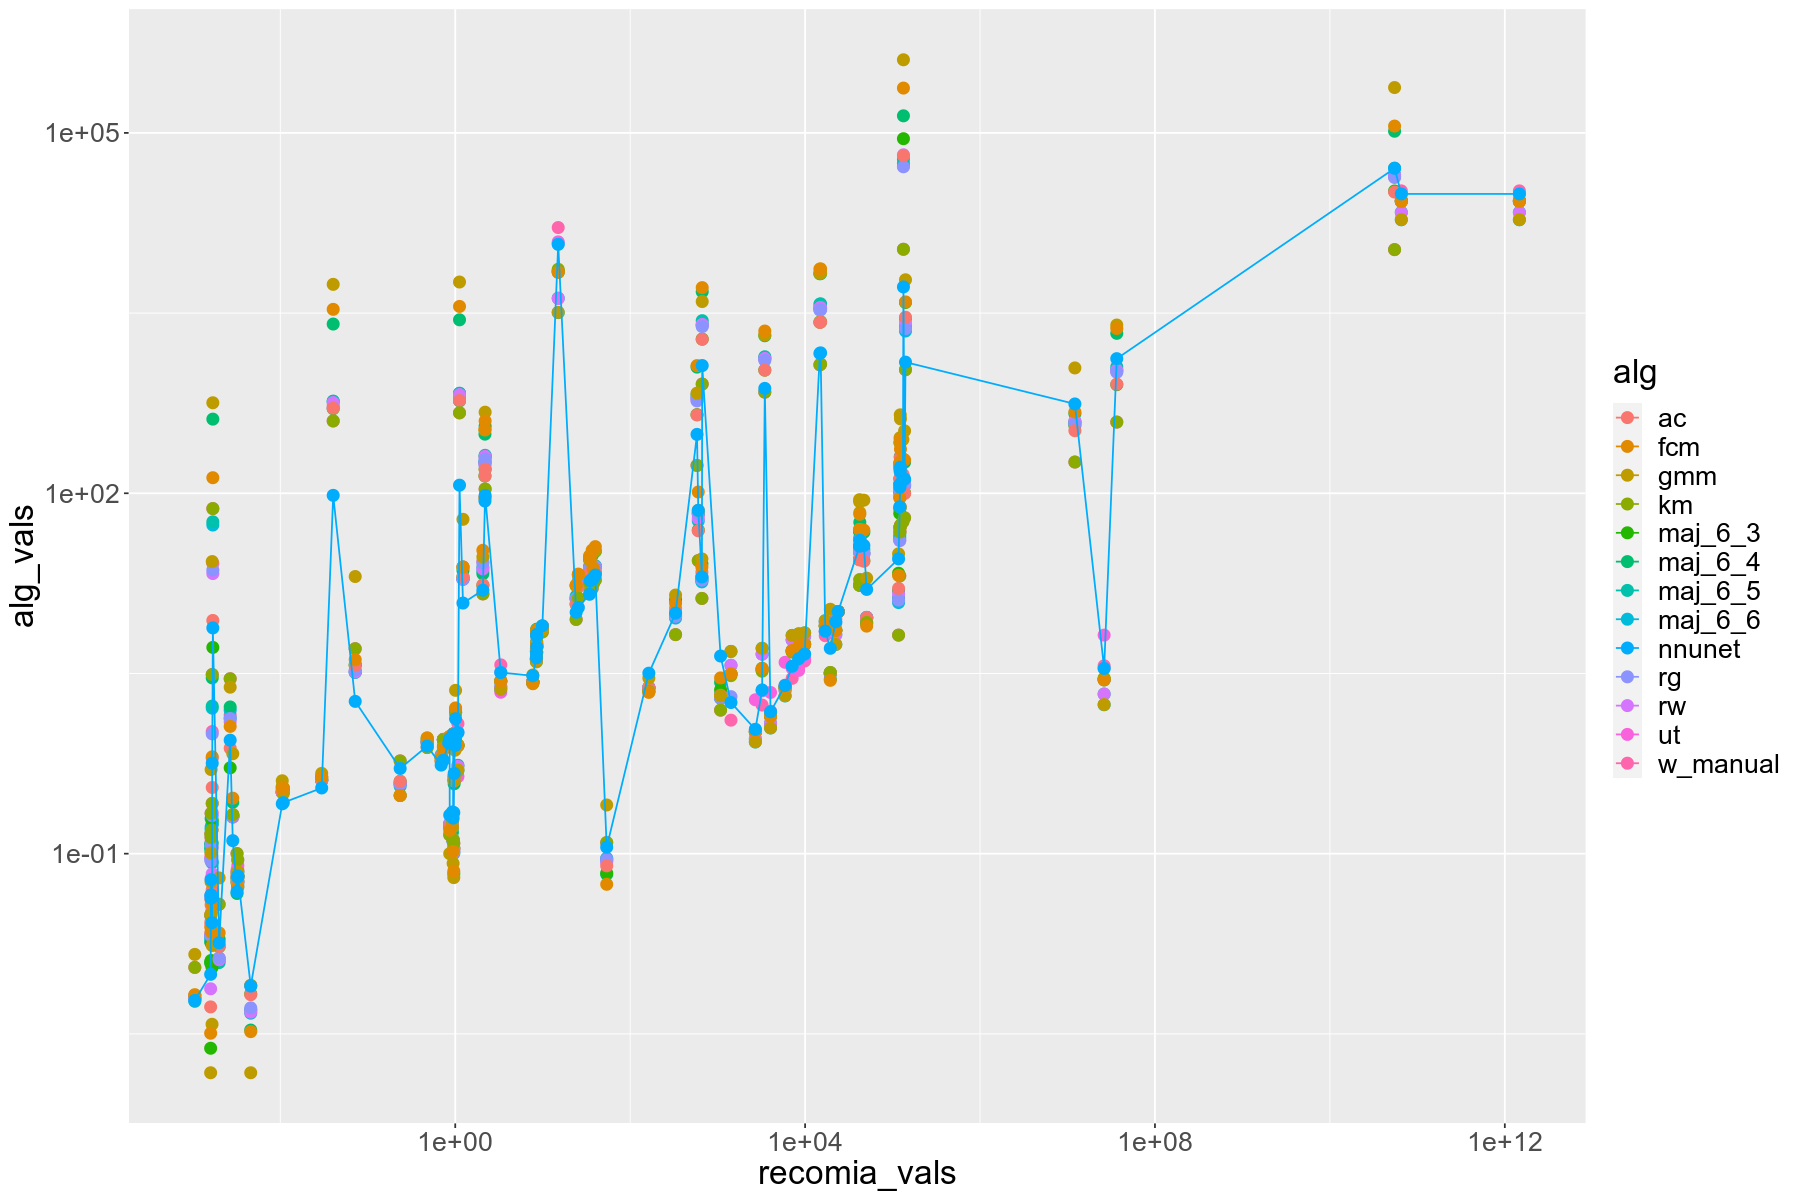

In [10]:
library("ggplot2")
options(repr.plot.width=15, repr.plot.height=10,repr.plot.pointsize=5)
ggplot(dataframe, aes(x=recomia_vals, y=alg_vals, colour=alg))+geom_point(size=3)+scale_x_log10()+scale_y_log10()+
theme(text = element_text(size = 20)) + geom_line(data=dataframe[-(nrow(dataframe)-length(ad):nrow(dataframe)),])

In [11]:
cor(as.numeric(dframe[13,]) ,as.numeric(dframe[14,]),use="complete.obs")

[1] 0.4928891

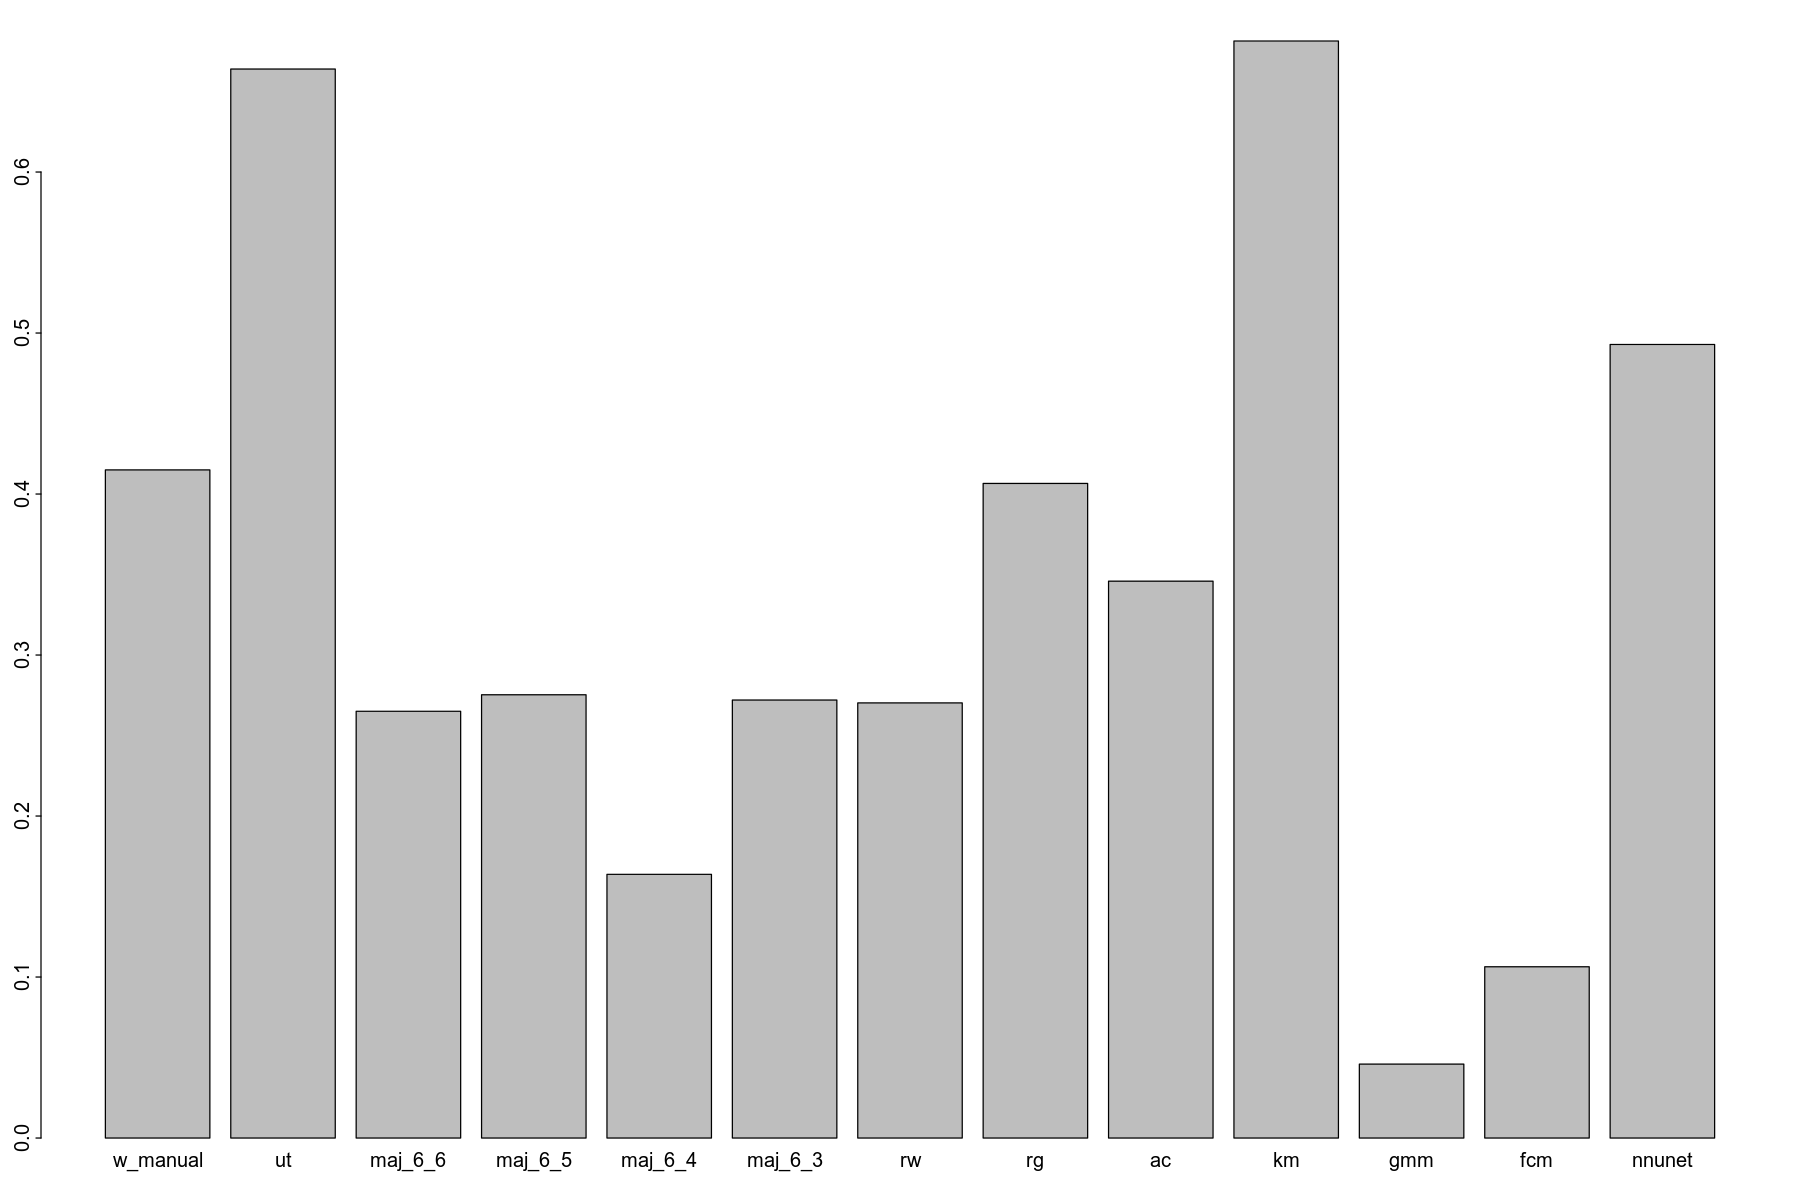

In [12]:
dataframecorr=c(cor(as.numeric(dframe[14,]),as.numeric(dframe[1,]),use="complete.obs"))
#names(dataframecorr)=c('cor_recomia_alg')
names(dataframecorr)=rownames(dframe)[1]
for(i  in seq(2,13,1)){
    tmp=c(cor(as.numeric(dframe[14,]),as.numeric(dframe[i,]),use="complete.obs"))
    names(tmp)=rownames(dframe)[i]
    #names(tmp)=c('cor_recomia_alg')
    dataframecorr=c(dataframecorr,tmp)
}
#grafikai setup
#options(repr.plot.width=75, repr.plot.height=75,repr.plot.pointsize=10)
#corrplot(log10(as.matrix(dframe)), is.corr=F)
barplot(dataframecorr)